In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import os
import json




In [2]:
ALL_EXP_PATH = r"C:\Users\karl\Desktop\DeliNet\src\models\exps"

def read_json(exp_name, top25=True):
    all_data = []
    all_names = []
    exp_full_path = os.path.join(ALL_EXP_PATH, exp_name)
    for model_name in sorted(os.listdir(exp_full_path)):
        path = os.path.join(exp_full_path, model_name, "meta.json")
        f = open(path)
        data = json.load(f)
        data = data["top x test acc:"]
        data = np.asarray(data)
        if top25:
            data = data[:,2] 
        else:
            data = data[:,1]
            print("using top10%")
        all_data.append(data)
        all_names.append(model_name)
       
            
    return all_data, all_names
    
read_json("Aug_exp");

In [12]:

def plot_(exp_folder, fig_name="test", custom_names = None, aspect_ratio=(10,5), ylim=(0.5, 0.9)):
    data, names = read_json(exp_folder)
    min_epochs = min([d.size for d in data])
    for i, name in enumerate(names): print(i, name)
    print("\n")
    if custom_names is not None:
        names = custom_names
        for i, name in enumerate(names): print(i, name)
        
    fig = plt.figure(figsize=aspect_ratio)
    for acc, name in zip(data, names):
        plt.plot(acc[:min_epochs], label=name)
    plt.ylim(ylim)
    plt.title(fig_name)
    plt.tight_layout()
    plt.ylabel("test accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.tight_layout()
    plt.savefig(fig_name + ".png", dpi=150)
    plt.show()

0 EfficientTrans_AND_DistilBert_mono
1 EfficientTrans_AND_DistilBert_mono_AutoAugment
2 EfficientTrans_AND_DistilBert_mono_RandAugment
3 EfficientTrans_AND_DistilBert_mono_TrivialAugmentWide


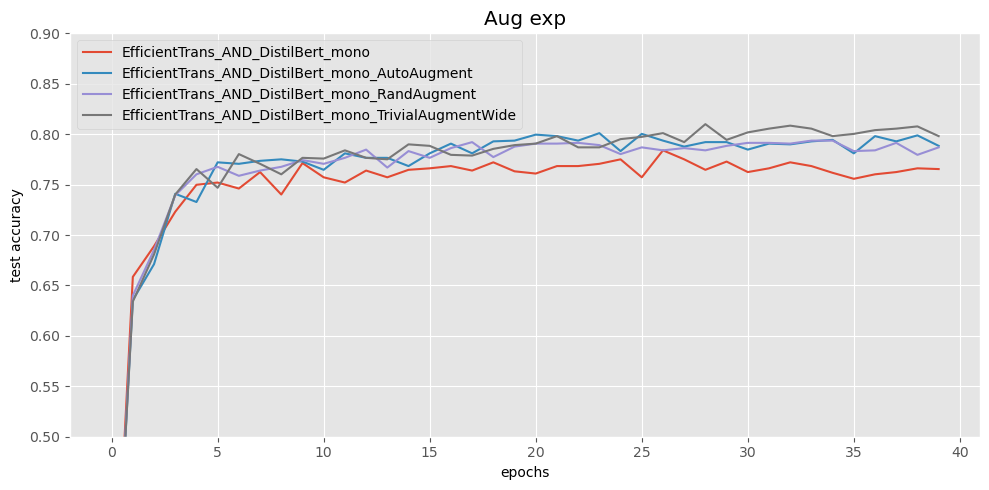

In [9]:
plot_("Aug_exp", fig_name="Aug exp")

order:  ['EfficientTransNonPre_AND_DistilBert_mono', 'EfficientTransNonPre_AND_DistilBert_mono_NonPre', 'EfficientTrans_AND_DistilBert_mono', 'EfficientTrans_AND_DistilBert_mono_NonPre']


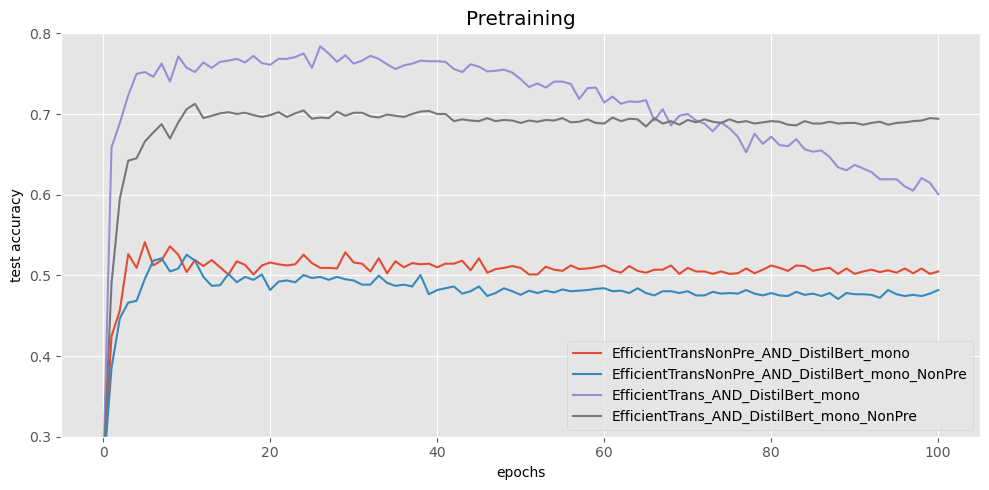

In [5]:
plot_("pretrained_exp", fig_name="Pretraining" ,ylim=(0.3, 0.8))

0 EfficientTrans_AND_DistilBert_2xInp
1 EfficientTrans_AND_DistilBert_2xNet
2 EfficientTrans_AND_DistilBert_3xInp
3 EfficientTrans_AND_DistilBert_3xNet
4 EfficientTrans_AND_DistilBert_mono
0 title + recipe        (2 inp)
1 title + recipe        (2 net)
2 title + recipe + desc (3 inp)
3 title + recipe + desc (3 net)
4 title only


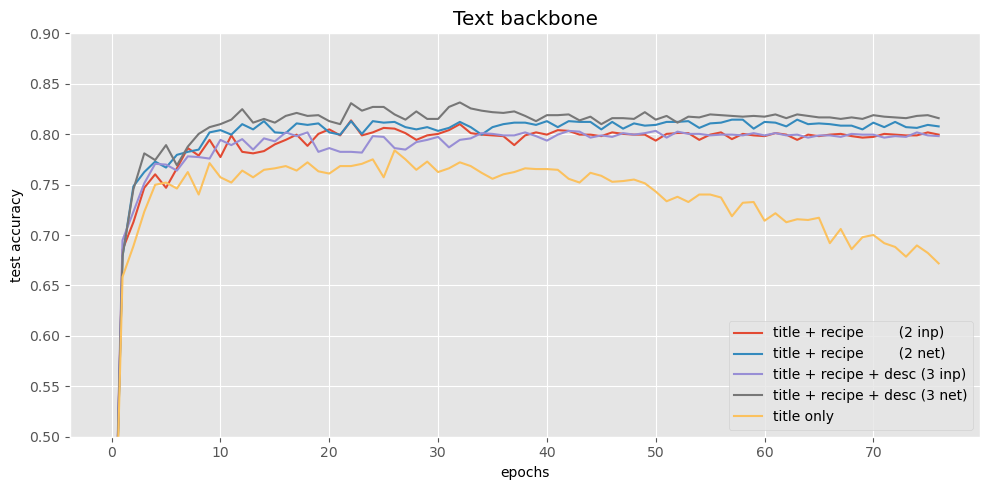

In [10]:
plot_("Text_backbone_exp", fig_name="Text usage", custom_names=[
      "title + recipe        (2 inp)",
      "title + recipe        (2 net)",
      "title + recipe + desc (3 inp)",
      "title + recipe + desc (3 net)",
      "title only",
])

0 EfficientTrans_AND_DistilBert_mono
1 Efficientnet4_AND_DistilBert_mono
2 ResNet18_AND_DistilBert_mono
3 ResNet50_AND_DistilBert_mono
4 ViT_AND_DistilBert_mono
0 Efficeint Trans
1 Efficeint Net
2 Res18
3 Res50
4 ViT


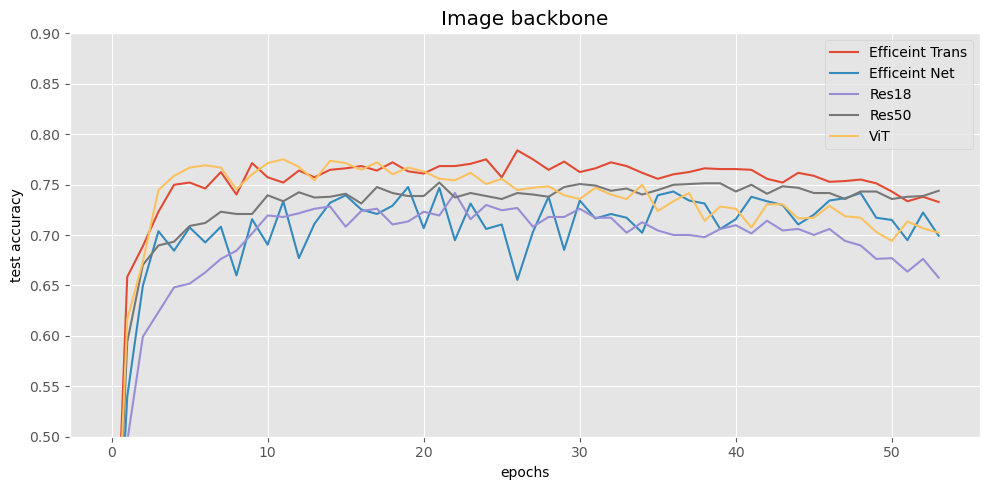

In [11]:
plot_("Vision_backbone_exp", fig_name="Image backbone",
      custom_names=[ "Efficeint Trans", "Efficeint Net", "Res18", "Res50", "ViT"
          
      ])